In [6]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import random
import pandas as pd
from dotenv import load_dotenv
import os

In [13]:
load_dotenv()
client_id = os.getenv("client_id")
client_secret = os.getenv("client_secret")

In [14]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [5]:
# Chose the following genres to pull songs from
genres = ['pop', 'rock', 'hip-hop', 'jazz', 'classical', 'electronic', 'reggae', 'blues', 'metal', 'indie']
songs_data = []

# Collect songs, aiming for 1000 total
for genre in genres:
    recommendations = sp.recommendations(seed_genres=[genre], limit=100)['tracks']  
    for track in recommendations:
  
        song_data = {
            "name": track['name'],
            "artist": track['artists'][0]['name'],
            "id": track['id'],
            "popularity": track['popularity'],
            "genre": genre
        }
        songs_data.append(song_data)
        

    if len(songs_data) >= 1000:
        break

if len(songs_data) > 1000:
    songs_data = random.sample(songs_data, 1000)


df_songs = pd.DataFrame(songs_data)

Total songs collected: 1000


In [6]:
# Extract song IDs:
song_ids = [song['id'] for song in songs_data]

# Fetch audio features:
audio_features = []
for i in range(0, len(song_ids), 100):
    batch_features = sp.audio_features(song_ids[i:i+100])
    audio_features.extend(batch_features)

# Combine audio features with basic song information
for i, features in enumerate(audio_features):
    if features
        songs_data[i].update(features)

In [7]:
df_songs = pd.DataFrame(songs_data)
pd.set_option('display.max_columns', None)
df_songs.head()

,name,artist,id,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,A Sky Full of Stars,Coldplay,0FDzzruyVECATHXKHFs9eJ,85,pop,0.545,0.675,6,-6.474,1,0.0279,0.00617,0.001970,0.2090,0.162,124.970,audio_features,spotify:track:0FDzzruyVECATHXKHFs9eJ,https://api.spotify.com/v1/tracks/0FDzzruyVECA...,https://api.spotify.com/v1/audio-analysis/0FDz...,267867,4
1,Call Out My Name,The Weeknd,1gm616Plq4ScqNi7TVkZ5N,0,pop,0.489,0.598,1,-4.929,1,0.0360,0.21800,0.000000,0.3500,0.172,134.045,audio_features,spotify:track:1gm616Plq4ScqNi7TVkZ5N,https://api.spotify.com/v1/tracks/1gm616Plq4Sc...,https://api.spotify.com/v1/audio-analysis/1gm6...,228373,3
2,Cool Girl,Tove Lo,3tJ4y2Zqx6gM9xOAuFfsSF,59,pop,0.674,0.694,9,-7.076,0,0.1090,0.31300,0.000007,0.0752,0.203,101.993,audio_features,spotify:track:3tJ4y2Zqx6gM9xOAuFfsSF,https://api.spotify.com/v1/tracks/3tJ4y2Zqx6gM...,https://api.spotify.com/v1/audio-analysis/3tJ4...,199179,4
3,Love U Better (feat. Lil Wayne & The-Dream),Ty Dolla $ign,270aLuFCbX32hhBr8MQyPM,48,pop,0.645,0.541,10,-6.312,0,0.0385,0.08020,0.000000,0.3250,0.411,95.061,audio_features,spotify:track:270aLuFCbX32hhBr8MQyPM,https://api.spotify.com/v1/tracks/270aLuFCbX32...,https://api.spotify.com/v1/audio-analysis/270a...,181880,4
4,You & Me,Marc E. Bassy,7yCqehT9dKACTFy7YugP0J,56,pop,0.449,0.635,1,-8.301,1,0.2750,0.04130,0.000000,0.1880,0.608,84.414,audio_features,spotify:track:7yCqehT9dKACTFy7YugP0J,https://api.spotify.com/v1/tracks/7yCqehT9dKAC...,https://api.spotify.com/v1/audio-analysis/7yCq...,218493,4


In [8]:
#df_songs.to_csv('/Users/katyakraft/Documents/IronHack/project_week_10/spotify_1000_songs.csv', index=False)

# Focus on danceability and energy features:

In [9]:
df_subset = df_songs[['danceability', 'energy']]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_subset)
df_scaled = pd.DataFrame(df_scaled, columns=['danceability', 'energy'])

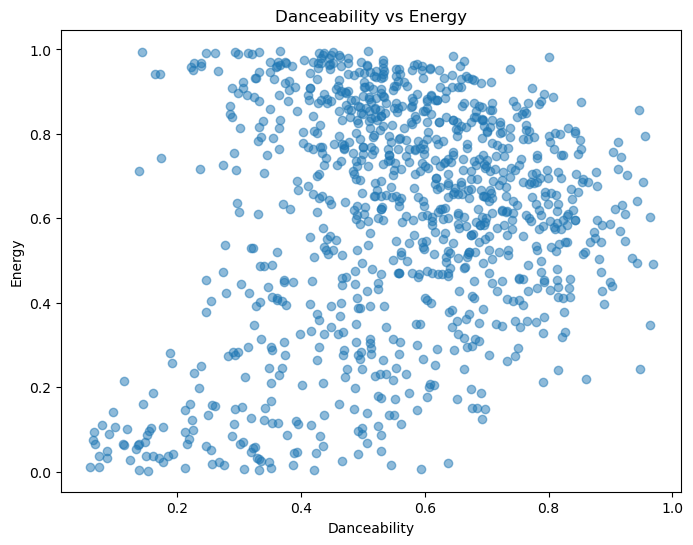

In [11]:
# Scatter plot of danceability vs energy
plt.figure(figsize=(8, 6))
plt.scatter(df_songs['danceability'], df_songs['energy'], alpha=0.5)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Danceability vs Energy')
plt.show()

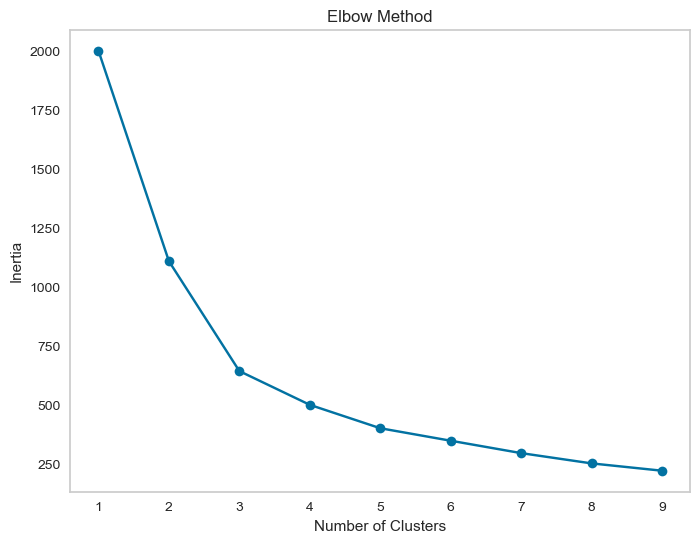

In [47]:
# Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(False)
plt.show()

k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df_songs['cluster'] = kmeans.fit_predict(df_scaled)

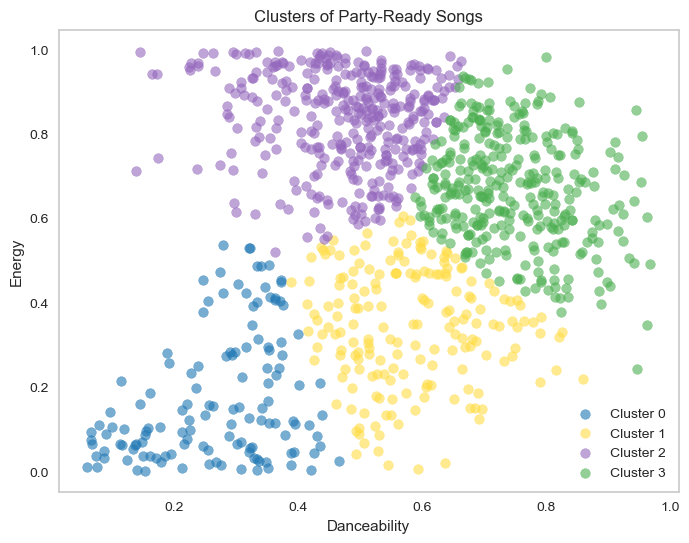

In [43]:
# Plot clusters on danceability vs energy

k = 4
colors = ['#1f77b4', '#ffdd44', '#9467bd', '#4caf50'] 

plt.figure(figsize=(8, 6))
for cluster in range(k):
    clustered_data = df_songs[df_songs['cluster'] == cluster]
    plt.scatter(clustered_data['danceability'], clustered_data['energy'], color=colors[cluster], label=f'Cluster {cluster}', alpha=0.6)
    
plt.grid(False)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Clusters of Party-Ready Songs')
plt.legend()
plt.show()

In [53]:
cluster_names = {
    0: "Laid-Back Beats",
    1: "Groove Warm-Up",
    2: "Dance Floor Ready",
    3: "All-Out Party"
}

cluster_summary = df_songs.groupby('cluster')[['danceability', 'energy']].mean()
cluster_summary['cluster_name'] = cluster_summary.index.map(cluster_names)
cluster_summary = cluster_summary[['cluster_name', 'danceability', 'energy']]
cluster_summary

,cluster_name,danceability,energy
cluster,,,
0,Laid-Back Beats,0.269180,0.173279
1,Groove Warm-Up,0.581561,0.345170
2,Dance Floor Ready,0.475895,0.833508
3,All-Out Party,0.746666,0.668469


In [21]:
#df_songs.to_csv("/Users/katyakraft/Documents/IronHack/project_week_10/clustered_songs.csv", index=False)

In [54]:
#df_songs.head()

,name,artist,id,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,A Sky Full of Stars,Coldplay,0FDzzruyVECATHXKHFs9eJ,85,pop,0.545,0.675,6,-6.474,1,0.0279,0.00617,0.001970,0.2090,0.162,124.970,audio_features,spotify:track:0FDzzruyVECATHXKHFs9eJ,https://api.spotify.com/v1/tracks/0FDzzruyVECA...,https://api.spotify.com/v1/audio-analysis/0FDz...,267867,4,2
1,Call Out My Name,The Weeknd,1gm616Plq4ScqNi7TVkZ5N,0,pop,0.489,0.598,1,-4.929,1,0.0360,0.21800,0.000000,0.3500,0.172,134.045,audio_features,spotify:track:1gm616Plq4ScqNi7TVkZ5N,https://api.spotify.com/v1/tracks/1gm616Plq4Sc...,https://api.spotify.com/v1/audio-analysis/1gm6...,228373,3,2
2,Cool Girl,Tove Lo,3tJ4y2Zqx6gM9xOAuFfsSF,59,pop,0.674,0.694,9,-7.076,0,0.1090,0.31300,0.000007,0.0752,0.203,101.993,audio_features,spotify:track:3tJ4y2Zqx6gM9xOAuFfsSF,https://api.spotify.com/v1/tracks/3tJ4y2Zqx6gM...,https://api.spotify.com/v1/audio-analysis/3tJ4...,199179,4,3
3,Love U Better (feat. Lil Wayne & The-Dream),Ty Dolla $ign,270aLuFCbX32hhBr8MQyPM,48,pop,0.645,0.541,10,-6.312,0,0.0385,0.08020,0.000000,0.3250,0.411,95.061,audio_features,spotify:track:270aLuFCbX32hhBr8MQyPM,https://api.spotify.com/v1/tracks/270aLuFCbX32...,https://api.spotify.com/v1/audio-analysis/270a...,181880,4,3
4,You & Me,Marc E. Bassy,7yCqehT9dKACTFy7YugP0J,56,pop,0.449,0.635,1,-8.301,1,0.2750,0.04130,0.000000,0.1880,0.608,84.414,audio_features,spotify:track:7yCqehT9dKACTFy7YugP0J,https://api.spotify.com/v1/tracks/7yCqehT9dKAC...,https://api.spotify.com/v1/audio-analysis/7yCq...,218493,4,2
